#Imports

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

import joblib

#CSV to Dataframe

In [2]:
# read in csv into dataframe
df = pd.read_csv('/content/insurance.csv')

In [3]:
# show numbers in rows of dataset
# show first 5 rows of dataset
print('Number of rows and columns: ', df.shape)
print('---------------------------------------')
df.head()

Number of rows and columns:  (1338, 7)
---------------------------------------


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Data Statistics

In [4]:
# check for any missing or null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# check datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# get statistics for columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#EDA

In [7]:
# show all unique values in columns
for col in df:
    uniques = np.unique(df[col])
    values = len(uniques)
    if values < 12:
        print('The # of values for {} :{} -- {}'.format(col, values, uniques))
    else:
        print('The # of values for {} :{}'.format(col, values))

The # of values for age :47
The # of values for sex :2 -- ['female' 'male']
The # of values for bmi :548
The # of values for children :6 -- [0 1 2 3 4 5]
The # of values for smoker :2 -- ['no' 'yes']
The # of values for region :4 -- ['northeast' 'northwest' 'southeast' 'southwest']
The # of values for charges :1337


In [8]:
# see all columns 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# define histogram plot for numerical columns
def plot_hist(features, dataframes):
  for f in features:
    plt.figure(figsize=(10,6))
    ax = sns.displot(x=f, data=dataframes, palette="mako")


In [10]:
# variable to hold only numerical columns
feats = df[['age','bmi', 'children','charges']]

<Figure size 720x432 with 0 Axes>

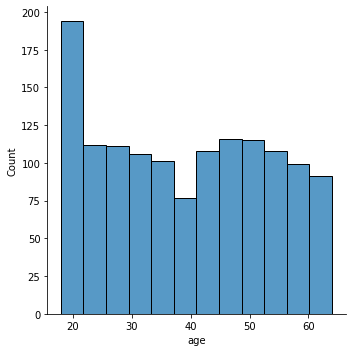

<Figure size 720x432 with 0 Axes>

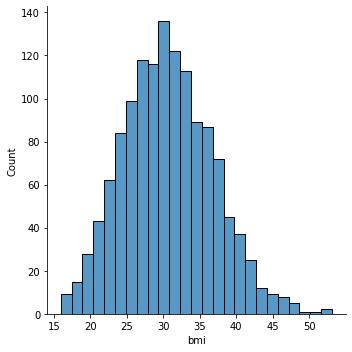

<Figure size 720x432 with 0 Axes>

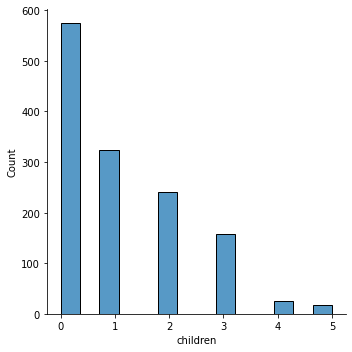

<Figure size 720x432 with 0 Axes>

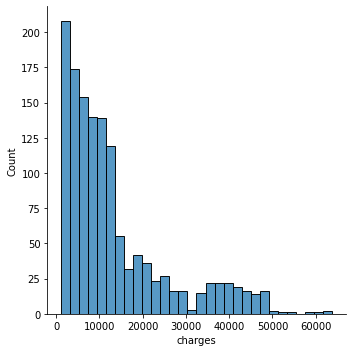

In [11]:
# visualize histogram of numerical columns
plot_hist(feats, df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


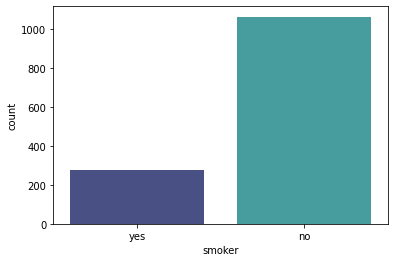

In [12]:
# visulize smoker 
sns.countplot(df['smoker'], palette="mako")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


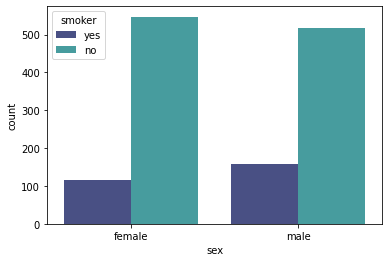

In [13]:
# visulize sex 
sns.countplot(df['sex'], hue='smoker', data=df, palette="mako")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


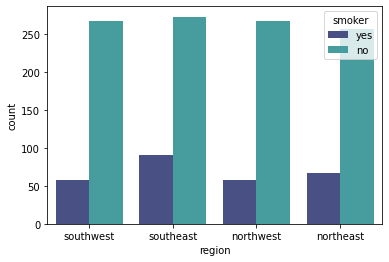

In [14]:
# visulize region 
sns.countplot(df['region'], hue='smoker', data=df, palette="mako")

#Hypothesis Testing

In [15]:
# build a contigency table for all columns

continTable = pd.crosstab(df['charges'], df['age'])
#continTable # recall variable to print to screen
continTable_2 = pd.crosstab(df['smoker'], df['charges'])
#continTable_2 # recall variable to print to screen
continTable_3 = pd.crosstab(df['region'], df['charges'])
#continTable_3 # recall variable to print to screen
continTable_4 = pd.crosstab(df['sex'], df['charges'])
#continTable_4 # recall variable to print to screen
continTable_5 = pd.crosstab(df['bmi'], df['charges'])
#continTable_5 # recall variable to print to screen
continTable_6 = pd.crosstab(df['children'], df['charges'])
#continTable_6 # recall variable to print to screen

In [16]:
# chi-testing
# checking all pvalues and significance
# to see if should reject the null hypthesis or if it fails
def chi_testing(tables):
  chi, p, dof, expected = chi2_contingency(tables)
  print('Chi ' + str(chi))
  print('P-Value ' + str(p))
  print('DOF ' + str(dof))
  print('Expected ' + str(expected))

  alpha = 0.05
  print("Significance = alpha= %.3f, p= %.3f " % (alpha,p) )
  if p < alpha:
    print("Dependent (reject null hypothesis)")
  else:
    print("Independent (fail to reject null hypthesis)")

In [17]:
chi_testing(continTable)
print('')
print('-------------------------------------------------------------------------')
chi_testing(continTable_2)
print('')
print('-------------------------------------------------------------------------')
chi_testing(continTable_3)
print('')
print('-------------------------------------------------------------------------')
chi_testing(continTable_4)
print('')
print('-------------------------------------------------------------------------')
chi_testing(continTable_5)
print('')
print('-------------------------------------------------------------------------')
chi_testing(continTable_6)

Chi 61548.00000000001
P-Value 0.3958180199236746
DOF 61456
Expected [[0.05156951 0.05082212 0.02167414 ... 0.01718984 0.01718984 0.01644245]
 [0.05156951 0.05082212 0.02167414 ... 0.01718984 0.01718984 0.01644245]
 [0.05156951 0.05082212 0.02167414 ... 0.01718984 0.01718984 0.01644245]
 ...
 [0.05156951 0.05082212 0.02167414 ... 0.01718984 0.01718984 0.01644245]
 [0.05156951 0.05082212 0.02167414 ... 0.01718984 0.01718984 0.01644245]
 [0.05156951 0.05082212 0.02167414 ... 0.01718984 0.01718984 0.01644245]]
Significance = alpha= 0.050, p= 0.396 
Independent (fail to reject null hypthesis)

-------------------------------------------------------------------------
Chi 1338.0
P-Value 0.47943654572545824
DOF 1336
Expected [[0.79521674 0.79521674 0.79521674 ... 0.79521674 0.79521674 0.79521674]
 [0.20478326 0.20478326 0.20478326 ... 0.20478326 0.20478326 0.20478326]]
Significance = alpha= 0.050, p= 0.479 
Independent (fail to reject null hypthesis)

------------------------------------------

#Prepare Data for Training

In [18]:
# check first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# convert categorical to numerical columns
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['region'] = df['region'].map({'northeast':1, 'northwest':2, 'southeast':3, 'southwest':4})

In [20]:
# provide a clean copy of new dataset
df.to_csv('clean_insurance.csv')

#Train Test Split

In [21]:
# prepare data for training and testing
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

#Models

In [22]:
# create multiple models for comparison
l_r = LinearRegression()
r_f = RandomForestRegressor()
g_b_r = GradientBoostingRegressor()
s_v_r = SVR()

l_r.fit(X_train,y_train)
r_f.fit(X_train,y_train)
g_b_r.fit(X_train,y_train)
s_v_r.fit(X_train,y_train)

SVR()

In [23]:
# variables for predictions
y_pred = l_r.predict(X_test)
y_pred_1 = r_f.predict(X_test)
y_pred_2= g_b_r.predict(X_test)
y_pred_3 = s_v_r.predict(X_test)

In [24]:
# create a new dataframe to see which 
# model is closets to the actual
df_1 = pd.DataFrame({'Acutal': y_test,
                    'L_R': y_pred,
                    'R_F': y_pred_1,
                    'G_B_R': y_pred_2,
                    'S_V_R': y_pred_3})

In [25]:
#print first 5 rows of new dataframe
df_1.head()

,Acutal,L_R,R_F,G_B_R,S_V_R
764,9095.06825,8931.421164,10579.274977,10613.512496,9505.536470
887,5272.17580,7070.906703,5489.946904,5680.434246,9455.615023
890,29330.98315,36937.080496,28282.831691,29627.694391,9595.450939
1293,9301.89355,9596.992144,11347.493913,9541.852526,9511.619149
259,33750.29180,27008.354871,34737.568873,34327.943251,9390.848271


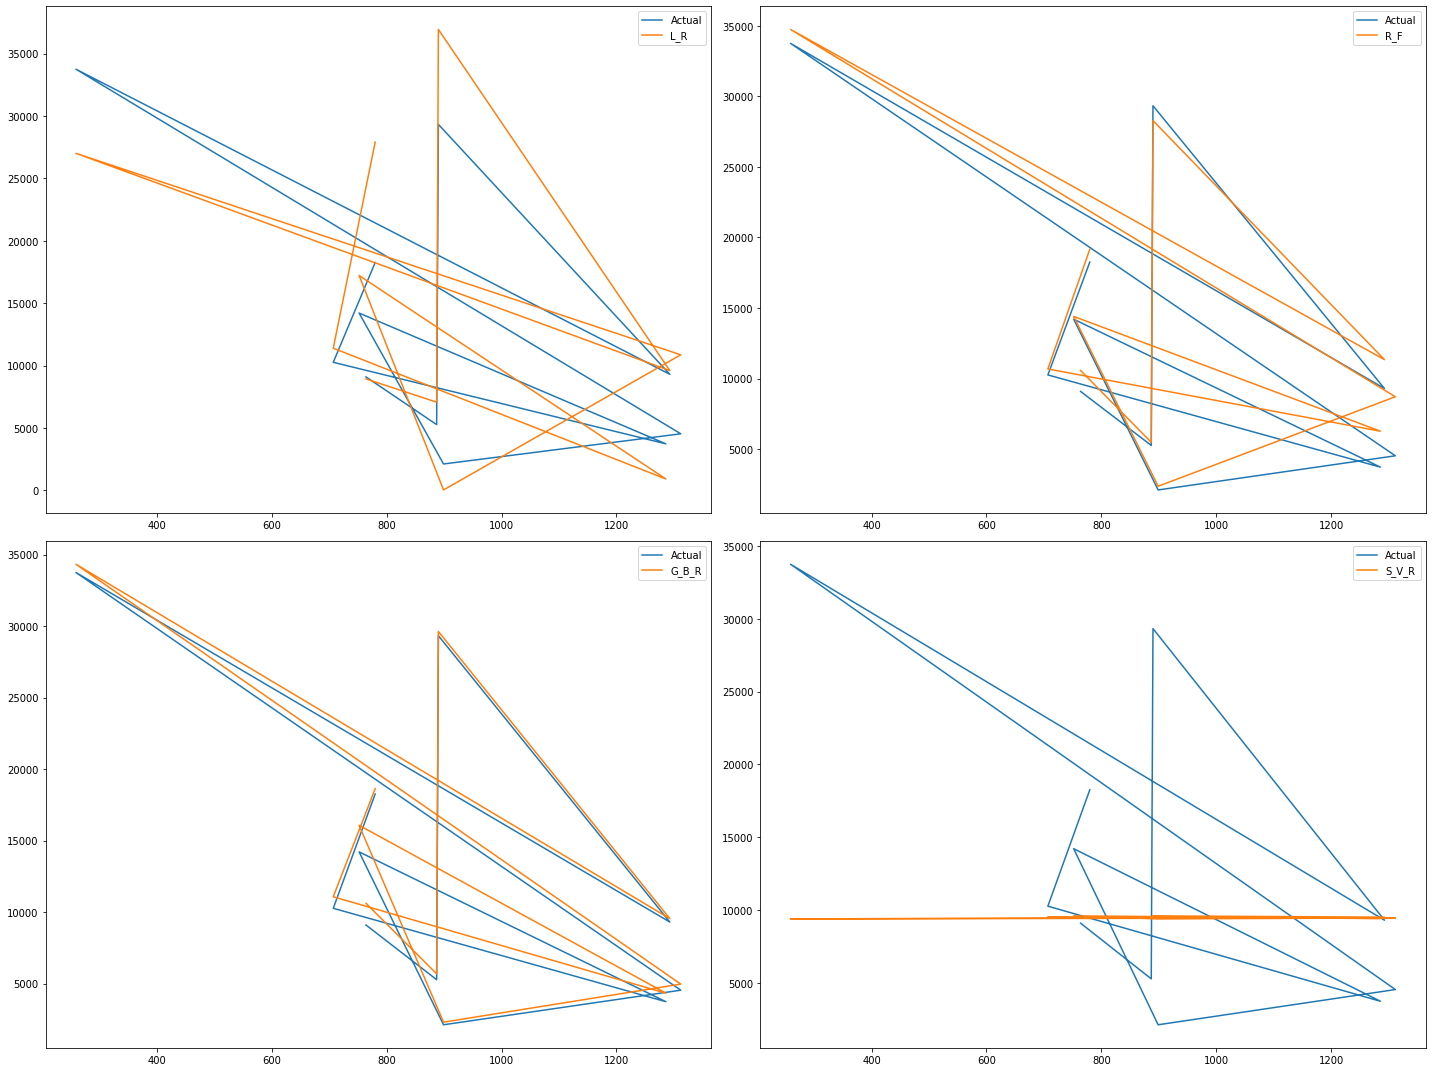

In [26]:
# create plots to further investigate which model is closets
# to actual 
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.plot(df_1['Acutal'].iloc[0:11], label='Actual')
plt.plot(df_1['L_R'].iloc[0:11], label='L_R')
plt.legend()
plt.subplot(222)
plt.plot(df_1['Acutal'].iloc[0:11], label='Actual')
plt.plot(df_1['R_F'].iloc[0:11], label='R_F')
plt.legend()
plt.subplot(223)
plt.plot(df_1['Acutal'].iloc[0:11], label='Actual')
plt.plot(df_1['G_B_R'].iloc[0:11], label='G_B_R')
plt.legend()
plt.subplot(224)
plt.plot(df_1['Acutal'].iloc[0:11], label='Actual')
plt.plot(df_1['S_V_R'].iloc[0:11], label='S_V_R')
plt.legend()
plt.tight_layout()

In [27]:
# get r2 score 
r_score = metrics.r2_score(y_test, y_pred)
r_score_1 = metrics.r2_score(y_test, y_pred_1)
r_score_2 = metrics.r2_score(y_test, y_pred_2)
r_score_3 = metrics.r2_score(y_test, y_pred_3)

# print r2 score to get our best model
# espcially since 2 of the above charts 
# are hard to tell and very close to actual
print("The r2 score for Linear Regression: ", r_score)
print("The r2 score for Random Forest: ", r_score_1)
print("The r2 score for Gradient Boosting: ", r_score_2)
print("The r2 score for SVR: ", r_score_3)

The r2 score for Linear Regression:  0.7694415927057694
The r2 score for Random Forest:  0.8529814014332066
The r2 score for Gradient Boosting:  0.8692747135127057
The r2 score for SVR:  -0.08170542295863803


In [28]:
# check the MAE 
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_1 = metrics.mean_absolute_error(y_test, y_pred_1)
mae_2 = metrics.mean_absolute_error(y_test, y_pred_2)
mae_3 = metrics.mean_absolute_error(y_test, y_pred_3)

# print all MAE for models
# see which model has the lowest MAE
print("The MAE for Linear Regression: ", mae)
print("The MAE for Random Forest: ", mae_1)
print("The MAE for Gradient Boosting: ", mae_2)
print("The MAE for SVR: ", mae_3)

The MAE for Linear Regression:  4155.239843059382
The MAE for Random Forest:  2574.0169544400505
The MAE for Gradient Boosting:  2428.6646380457364
The MAE for SVR:  8229.825274943045


#Test Model on Unseen Data

In [29]:
# create 2 new entries to test model 
data = {'age':23,
      'sex':0,
      'bmi':34.76,
      'children':2,
      'smoker': 1,
      'region':3}


data2 = {'age':50,
      'sex':0,
      'bmi':39.76,
      'children':2,
      'smoker': 0,
      'region':3}
df_pd = pd.DataFrame(data, index=[0])
df_pd_2 = pd.DataFrame(data2, index=[0])


df_pd


,age,sex,bmi,children,smoker,region
0,23,0,34.76,2,1,3


In [30]:
# get predicted cost
predicts_cost = g_b_r.predict(df_pd)
print("The cost of health insurace is : ", predicts_cost)

The cost of health insurace is :  [35727.99328605]


In [31]:
# train on whole dataset
g_b_r = GradientBoostingRegressor()
g_b_r.fit(X,y)

GradientBoostingRegressor()

#Joblib

In [32]:
# save the model 
joblib.dump(g_b_r, 'GBR_joblib_model')

['GBR_joblib_model']

In [33]:
# reload the model to do a prediction
model = joblib.load('GBR_joblib_model')

In [34]:
# print the new prediction 
# since now the whole dataset 
# has been used
model.predict(df_pd)

array([36136.07416289])